# SVM Loan Approver

There are a number of classification algorithms that can be used to determine loan elgibility. Some algorithms run better than others. Build a loan approver using the SVM algorithm and compare the accuracy and performance of the SVM model with the Logistic Regression model.

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")


In [2]:
# Read in the data
# Note: The following data has been normalized between 0 and 1
data = Path('../Resources/loans.csv')
loan_status_df = pd.read_csv(data)
loan_status_df.head()

,assets,liabilities,income,credit_score,mortgage,status
0,0.210859,0.452865,0.281367,0.628039,0.302682,deny
1,0.395018,0.661153,0.330622,0.638439,0.502831,approve
2,0.291186,0.593432,0.438436,0.434863,0.315574,approve
3,0.458640,0.576156,0.744167,0.291324,0.394891,approve
4,0.463470,0.292414,0.489887,0.811384,0.566605,approve


## Separate the Features (X) from the Target (y)

In [3]:
# Segment the features from the target
X = loan_status_df.drop(columns="status")
y = loan_status_df["status"]

## Split our data into training and testing

In [4]:
from sklearn.model_selection import train_test_split

# Use the train_test_split function to create training and testing subsets 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=1, 
                                                    stratify=y
                                                    )

## Create a SVM Model

In [13]:
# Instantiate a linear SVM model
from sklearn.svm import SVC 
classifier = SVC(kernel="linear")
classifier

SVC(kernel='linear')

## Fit (train) or model using the training data

In [14]:
# Fit the data
classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Score the model using the test data

In [18]:
# Score the accuracy and print results
print(f" Train Data {classifier.score(X_train, y_train)}")
print(f" Test Data {classifier.score(X_test, y_test)}")

 Train Data 0.6133333333333333
 Test Data 0.6


## Make predictions

In [23]:
# Make predictions using the test data 
predictions = classifier.predict(X_test)
results = pd.DataFrame(
    {
        "Prediictions": predictions,
        "Actiual": y_test
    }
).reset_index(drop=True)

results.head()

,Prediictions,Actiual
0,approve,deny
1,deny,approve
2,deny,deny
3,approve,deny
4,deny,deny


# Generate Confusion Matrix

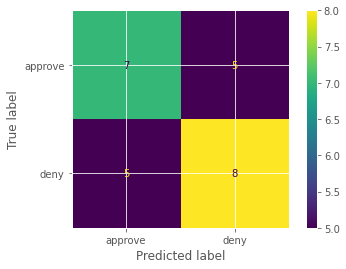

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix = confusion_matrix(y_test, predictions)

ConfusionMatrixDisplay(matrix, display_labels=classifier.classes_).plot()


# Generate Classification Report

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

     approve       0.58      0.58      0.58        12
        deny       0.62      0.62      0.62        13

    accuracy                           0.60        25
   macro avg       0.60      0.60      0.60        25
weighted avg       0.60      0.60      0.60        25

